# fashion_minist app demo

# 构建断点续训的模型

In [3]:
import tensorflow as tf
import os

fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

# 指定断点续训的路径
model_save_path = './checkpoint_fashion_mnist/fashion_mnist.ckpt'

if os.path.exists(model_save_path + '.index'):
    print('-------------load the model-----------------')
    model.load_weights(model_save_path)

# 定义断点续训回调函数
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=model_save_path,
                                                save_weights_only=True,
                                                save_best_only=True)
history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), validation_freq=1,
                    callbacks=[cp_callback])
model.summary()


-------------load the model-----------------
Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2969 - sparse_categorical_accuracy: 0.8915 - val_loss: 0.3522 - val_sparse_categorical_accuracy: 0.8745
Epoch 2/5
1875/1875 [==============================] - 2s 908us/step - loss: 0.2804 - sparse_categorical_accuracy: 0.8958 - val_loss: 0.3547 - val_sparse_categorical_accuracy: 0.8739
Epoch 3/5
1875/1875 [==============================] - 2s 963us/step - loss: 0.2684 - sparse_categorical_accuracy: 0.9006 - val_loss: 0.3356 - val_sparse_categorical_accuracy: 0.8798
Epoch 4/5
1875/1875 [==============================] - 2s 937us/step - loss: 0.2594 - sparse_categorical_accuracy: 0.9032 - val_loss: 0.3446 - val_sparse_categorical_accuracy: 0.8767
Epoch 5/5
1875/1875 [==============================] - 2s 960us/step - loss: 0.2484 - sparse_categorical_accuracy: 0.9083 - val_loss: 0.3372 - val_sparse_categorical_accuracy: 0.8788
Model: "sequential_1"
____________________

## 绘制模型acc曲线和loss曲线

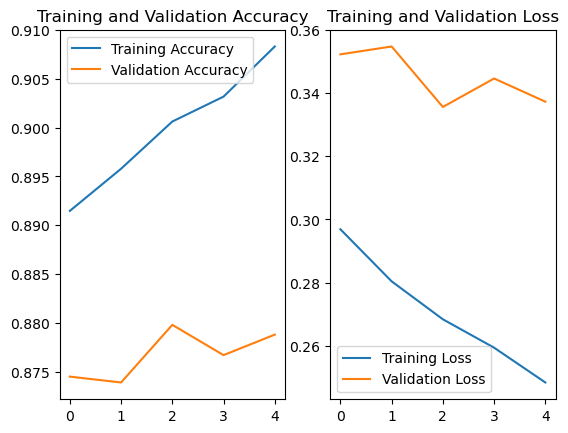

In [4]:
import matplotlib.pyplot as plt

acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# 绘制训练集和验证集的acc曲线
plt.subplot(1,2,1)
plt.plot(acc,label='Training Accuracy')
plt.plot(val_acc,label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# 绘制训练集和验证集的loss曲线
plt.subplot(1,2,2)
plt.plot(loss,label='Training Loss')
plt.plot(val_loss,label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# 预测真实数据的类型

In [10]:
from PIL import Image
import numpy as np
import tensorflow as tf

model_save_path = './checkpoint_fashion_mnist/fashion_mnist.ckpt'

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.load_weights(model_save_path)

preNum = int(input("input the number of test pictures:"))
base_path = './fashion_mnist/'
for i in range(preNum):
    image_path = input("input the image path ")
    img = Image.open(base_path + image_path)
    img = img.resize((28, 28), Image.Resampling.LANCZOS)
    img_arr = np.array(img.convert('L'))
    
    for i in range(28):
        for j in range(28):
            if img_arr[i][j] < 200:
                img_arr[i][j] = 255
            else:
                img_arr[i][j] = 0
                
    img_arr = img_arr / 255.0
    x_predict = img_arr[tf.newaxis, ...]
    result = model.predict(x_predict)
    
    pred = tf.argmax(result, axis=1)
    print('\n')
    tf.print(f'{image_path} ==> {pred}')

1/1 [==============================] - 0s 44ms/step


3_dress.jpeg ==> [3]
